In [91]:
import numpy as np
np.random.seed(42)
X = np.linspace(-np.pi,np.pi, 100)
y = np.sin(X) #+ np.random.randn(100)  #  노이즈 추가

In [92]:
# 가중치 초기값
a,b,c,d = 0. , 0. , 0. , 0.
eta  = 1e-3  #learning rate  0.001
epochs = 1000

In [93]:
# 학습과정 기록  손실값, 파라메터의 값
mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )

📉 딥러닝 학습의 기본골격
- 모델의 출력 (예측)

    - y_hat = ax**3 + bx**2 + cx + d

- 오차 

    - e = y - y_hat

- 손실함수 평균제곱오차(MSE, Mean Squared Error) = np.mean(e^2)

    - $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$


🧠 왜 제곱을 쓰는가?

- 음수 오차를 상쇄하지 않기 위해
→ (예: +5, -5 오차가 평균 0으로 되면 안 됨)

- 큰 오차에 더 큰 패널티를 주기 위해
→ 제곱을 하면 큰 오차일수록 손실이 급격히 커짐
→ 모델이 큰 오차를 더 빠르게 줄이도록 유도

📘 기울기 DL / Dseta(seta = a,b,c,d중에 하나)
- 손실 L이 y_hat을 통해 seta에 의존, 연쇄법칙이 가능
    - a로 편미분 $x**3$
    - b로 편미분 $x**2$
    - c로 편미분 $x$
    - d로 편미분 1

    - 기울기 $a = 2(y - \hat{y})x^3$
    - 기울기 $b = 2(y - \hat{y})x^2$
    - 기울기 $c = 2(y - \hat{y})x$
    - 기울기 $d = 2(y - \hat{y})*1$



In [94]:
for epoch in range(epochs):
    y_hat = a*X**3 + b*X**2 + c*X + d
    e = y - y_hat

    # mse
    mse = np.mean(e**2)
    mse_history[epoch] = mse

    # gradients
    da = np.mean(-e*X**3)
    db = np.mean(-e*X**2)
    dc = np.mean(-e*X)
    dd = np.mean(-e)

    #update
    a -= eta*2*da
    b -= eta*2*db
    c -= eta*2*dc
    d -= eta*2*dd

    parameter_history[epoch] = [a,b,c,d]

# 최종결과
print(a,b,c,d,mse)

-0.050959507558349174 -8.782115472449476e-18 0.5562755135570281 2.1713693207411664e-17 0.051856624882668664


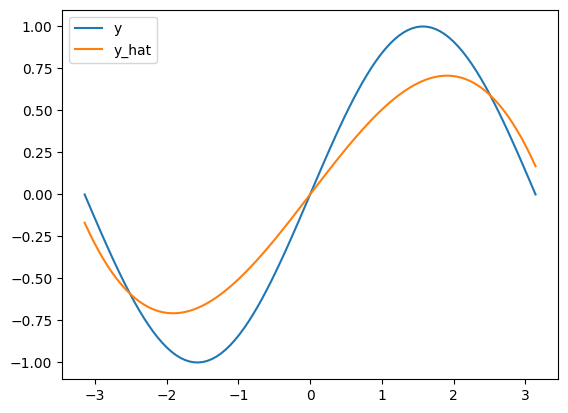

In [95]:
# 수동 미분 계산
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat, label='y_hat')
plt.legend()
plt.show()

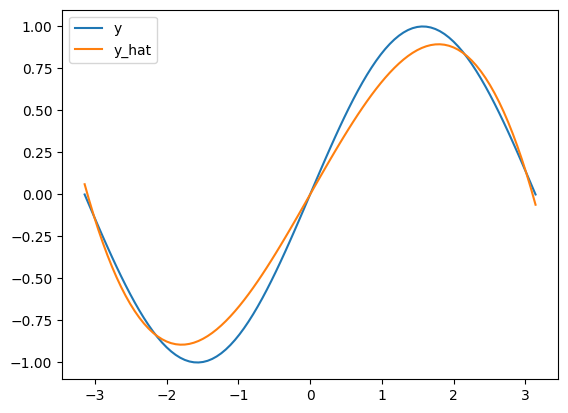

In [96]:
# 텐서로 변경  - 자동미분
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )
for epoch in range(epochs):
    # forward 즉 모델
    y_hat = a*X**3 + b*X**2 + c*X + d
    # 오차
    mse = torch.mean( (y - y_hat)**2  )
    mse.backward()
    mse_history[epoch] = mse.item()
    # 역전파 - 수동
    with torch.no_grad():  # 메모리측면에서 기록을 안한담
        a -= eta*2*a.grad
        b -= eta*2*b.grad
        c -= eta*2*c.grad
        d -= eta*2*d.grad
        # 그레이디언트 초기화
        a.grad.zero_(); b.grad.zero_(); c.grad.zero_(); d.grad.zero_()
    parameter_history[epoch] = [a.item(), b.item(), c.item(), d.item()]

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()

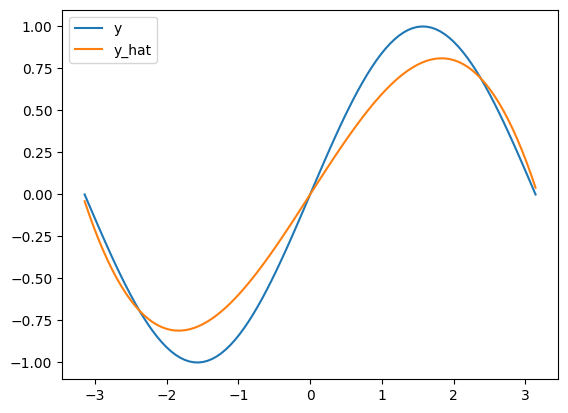

In [97]:
from torch.optim import Adam
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

optim = Adam([a,b,c,d], lr = eta)
for epoch in range(epochs):
    optim.zero_grad()

    y_hat = a*X**3 + b*X**2 + c*X + d
    
    e = y - y_hat
    mse = torch.mean(e**2)
    mse.backward()
    optim.step()

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()

In [98]:
# 가중치 w
# Xseta = {X**3, X**2, X, 1}
# w = [a,b,c,d]
# y_hat = Xseta dot w

In [99]:
torch.stack([X**3, X**2, X, torch.ones_like(X)], dim = 1).size()

torch.Size([100, 4])

In [100]:
X.size()

torch.Size([100])

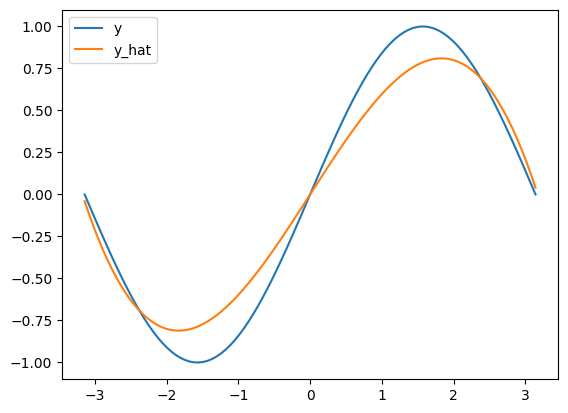

In [101]:
from torch.optim import Adam
import torch
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

eta = 1e-3
epochs = 1000

#기저함수 행렬 (100,4)
X_theta = torch.stack([X**3, X**2, X, torch.ones_like(X) ],dim=1)
# 가중치 벡터
w = torch.tensor([0. , 0. , 0. , 0.], requires_grad=True)

optim = Adam([w], lr=eta)

for epoch in range(epochs):
    optim.zero_grad()
    
    y_hat = X_theta@w  # (100,4) 하고 내접 (4,)  =  (100,)

    e  = y-y_hat
    mse = torch.mean(e**2)
    
    mse.backward()
    optim.step()
    
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()   

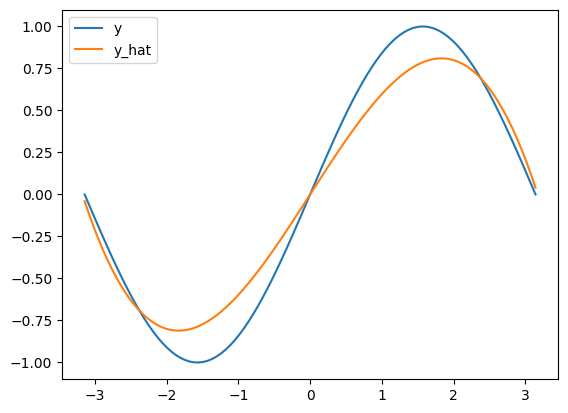

In [102]:
from torch.optim import Adam
import torch
import torch.nn as nn
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

# 하이퍼파라메터
eta = 1e-3
epochs = 1000

#기저함수 행렬 (100,4)
X_theta = torch.stack([X**3, X**2, X, torch.ones_like(X) ],dim=1)
# 가중치 벡터 초기화
w = torch.zeros(4, requires_grad=True)
# 가중치 적용하는 옵티마이저 사용
optim = Adam([w], lr=eta)
# 손실함수 정의
criterion = nn.MSELoss()

for epoch in range(epochs):
    optim.zero_grad()
    
    y_hat = X_theta@w  # (100,4) 하고 내접 (4,)  =  (100,)

    loss = criterion(y_hat, y)
    
    loss.backward()
    optim.step()
    
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()   

In [103]:
# X는 텐서이고 100,4 형태로 제공
# 각 차수에 대응하는 가중치를 정해서 -> 토치의 모델을 사용하면 가중치는 우리가 정하지 않고 계산된다
# 내적연산을 해서 예측하고 
# 그 예측에 대한 오차를 구해서 (=손실함수)
# 손실함수의 값을 최소화할 수 있는 기울기를 계산
# 업데이트 해서 다음 계산에 업데이트된 가중치를 사용 
    # 이 과정을 epochs만큼 반복하는 것이 딥러닝이다.

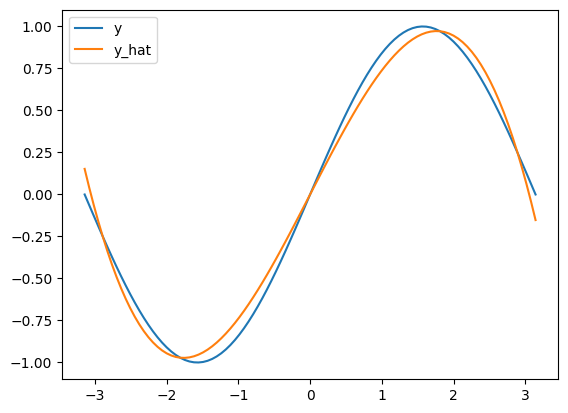

In [104]:
import torch.nn as nn
model = nn.Linear(4,1,bias=False)


from torch.optim import Adam
import torch
import numpy as np
import torch.nn as nn
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

# 하이퍼파라메터
eta = 1e-3
epochs = 5000
#기저함수 행렬 (100,4)
X_theta = torch.stack([X**3, X**2, X, torch.ones_like(X) ],dim=1)

# 가중치 적용
optim = Adam(model.parameters(), lr=eta)
# 손실함수
criterion = nn.MSELoss()

for epoch in range(epochs):
    optim.zero_grad()
    
    y_hat = model(X_theta).squeeze()
    loss =criterion(y_hat, y)    
    loss.backward()
    optim.step()
    
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()    

In [105]:
X = np.array([1,2,3])
a,b = 2,3
print(X**3)
print(X**2)
print(a*X**3 + b*X**2)

[ 1  8 27]
[1 4 9]
[ 5 28 81]


In [106]:
phi = np.stack([ X**3, X**2],axis=1 )
w = np.array([2,3])
pred = phi@w